In [1]:
from langchain_google_vertexai import ChatVertexAI
from langchain.prompts import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    ChatPromptTemplate,
    HumanMessagePromptTemplate
)

from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from langchain.output_parsers.json import SimpleJsonOutputParser

from typing import List, Tuple

import os
import json
import random

In [2]:
METRICS_PATH = ".\\metrics.json"

with open(METRICS_PATH, "r", encoding="UTF-8") as file:
    metrics_data = json.load(file)

In [3]:
CATEGORIES_PATH = ".\\categories.txt"

with open(CATEGORIES_PATH, "r", encoding="UTF-8") as file:
    categories_array = file.read().splitlines()

categories_txt = "\n".join([f"{i}. {category}" for i, category in enumerate(categories_array, start=1)])

In [84]:
METRICS_CLASSIFY_DATASET_PATH = ".\\metrics_classify_dataset.json"

with open(METRICS_CLASSIFY_DATASET_PATH, "r", encoding="UTF-8") as file:
    metrics_classify = json.load(file)

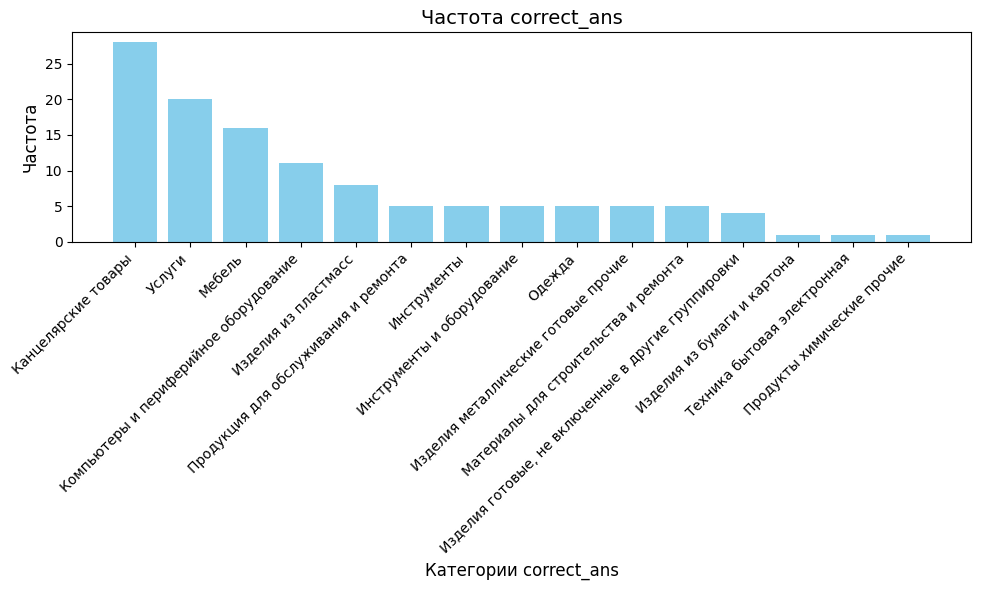

In [85]:
import matplotlib.pyplot as plt
from collections import Counter
import json

# Извлечение всех correct_ans
correct_answers = [item["correct_ans"] for item in metrics_classify]

# Подсчет частоты каждого correct_ans
frequency = Counter(correct_answers)

# Сортировка по частоте (по убыванию)
sorted_freq = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

# Разделение на метки и значения для графика
labels, values = zip(*sorted_freq)

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('Частота correct_ans', fontsize=14)
plt.xlabel('Категории correct_ans', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворот меток для лучшей читаемости
plt.tight_layout()  # Автоматическая подгонка layout

# Показать график
plt.show()

In [82]:
shop_categories = Counter()

for item in metrics_classify:
    for category in item["categories"]:
        shop_categories[category] += 1

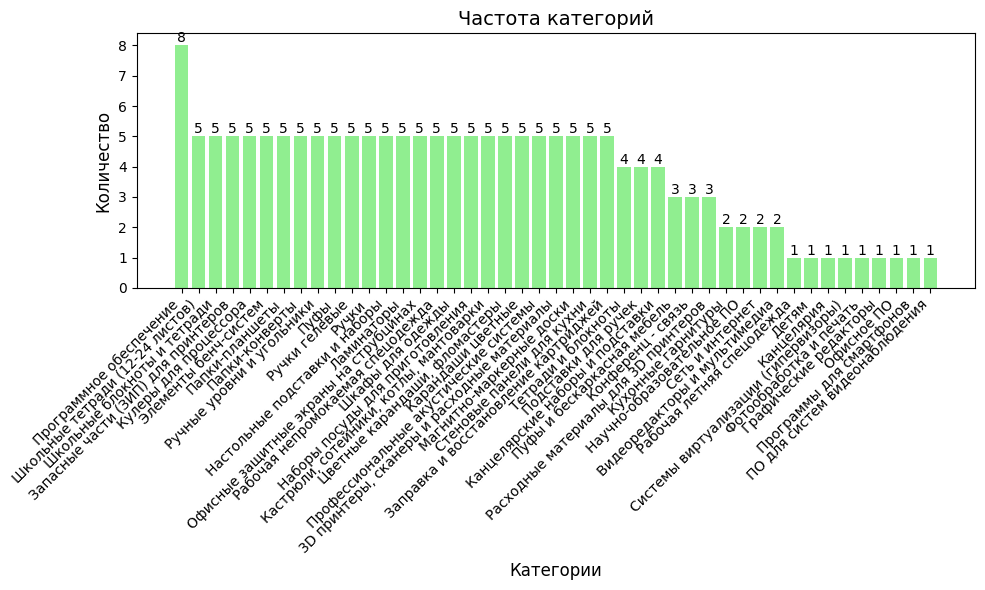


Частота категорий:
-----------------
Программное обеспечение: 8
Школьные тетради (12-24 листов): 5
Школьные блокноты и тетради: 5
Запасные части (ЗИП) для принтеров: 5
Кулеры для процессора: 5
Элементы бенч-систем: 5
Папки-планшеты: 5
Папки-конверты: 5
Ручные уровни и угольники: 5
Пуфы: 5
Ручки гелевые: 5
Ручки: 5
Настольные подставки и наборы: 5
Ламинаторы: 5
Офисные защитные экраны на струбцинах: 5
Рабочая непромокаемая спецодежда: 5
Шкафы для одежды: 5
Наборы посуды для приготовления: 5
Кастрюли, сотейники, котлы, мантоварки: 5
Цветные карандаши, фломастеры: 5
Карандаши цветные: 5
Профессиональные акустические системы: 5
3D принтеры, сканеры и расходные материалы: 5
Магнитно-маркерные доски: 5
Стеновые панели для кухни: 5
Заправка и восстановление картриджей: 5
Тетради и блокноты: 4
Подставки для ручек: 4
Канцелярские наборы и подставки: 4
Пуфы и бескаркасная мебель: 3
Конференц - связь: 3
Расходные материалы для 3D принтеров: 3
Кухонные гарнитуры: 2
Научно-образовательное ПО: 2
Се

In [83]:
# Сортировка по частоте (по убыванию)
sorted_categories = sorted(shop_categories.items(), key=lambda x: x[1], reverse=True)

# Разделение на метки и значения для графика
labels, counts = zip(*sorted_categories)

# Создание графика
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='lightgreen')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Частота категорий', fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Вывод таблицы частот
print("\nЧастота категорий:")
print("-----------------")
for category, count in sorted_categories:
    print(f"{category}: {count}")

In [14]:
for item in metrics_classify:
    if item["correct_ans"] not in categories_array:
        print(item["correct_ans"])

Продукты химические прочие, не включенные в другие группировки
Изделия резиновые и пластмассовые
Изделия резиновые и пластмассовые


In [19]:
PATH = "..\\..\\src\\data\\komus\\dataset.json"

with open(PATH, "r", encoding="UTF-8") as file:
    data = json.load(file)

len(data)

83755

In [73]:
programs = []

for item in data:
    # if "Программ" in item["title"]:
    #     # print(item["title"])
    #     # print(item["category"])
    #     programs.append(item)
    # elif 'Программное обеспечение' in item["category"]:
    #     programs.append(item)
    if 'Заправка' in item["title"]:
        programs.append(item)

In [74]:
len(programs)

services = [{
    "title": item["title"],
    "categories": item["category"],
    "correct_ans": 'Услуги'
} for item in random.choices(programs, k = 5)]

services

[{'title': 'Заправка картриджа Samsung MLT-D105S',
  'categories': ['Заправка и восстановление картриджей'],
  'correct_ans': 'Услуги'},
 {'title': 'Заправка картриджа HP 26X CF226X (Липецк)',
  'categories': ['Заправка и восстановление картриджей'],
  'correct_ans': 'Услуги'},
 {'title': 'Заправка картриджа Samsung CLT-Y404S (Москва)',
  'categories': ['Заправка и восстановление картриджей'],
  'correct_ans': 'Услуги'},
 {'title': 'Заправка картриджа HP 659X W2011X (Москва)',
  'categories': ['Заправка и восстановление картриджей'],
  'correct_ans': 'Услуги'},
 {'title': 'Заправка картриджа HP Q7570A (Белгород)',
  'categories': ['Заправка и восстановление картриджей'],
  'correct_ans': 'Услуги'}]

In [75]:
metrics_classify += services

In [76]:
len(metrics_classify)

120

In [79]:
with open(METRICS_CLASSIFY_DATASET_PATH, "w", encoding="utf-8") as file:
    json.dump(metrics_classify, file, ensure_ascii=False, indent=4)